In [68]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Step 1: Explore the data 

# Read in data from NASA exoplenet archive 
df = pd.read_csv(r"C:\Users\julia\Downloads\csv_main.csv", skiprows=78)

In [3]:
df.head()

,pl_name,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,NaN,NaN,NaN,NaN,1.210,0.06,-0.05,0.0,NaN,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 Com b,326.03000,0.32,-0.32,0.0,1.290,0.05,-0.05,0.0,NaN,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
2,11 Com b,323.21000,0.06,-0.05,0.0,1.178,0.00,0.00,0.0,NaN,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
3,11 UMi b,516.21997,3.20,-3.20,0.0,1.530,0.07,-0.07,0.0,NaN,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
4,11 UMi b,NaN,NaN,NaN,NaN,1.510,0.06,-0.05,0.0,NaN,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903


In [4]:
df.describe()

,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
count,3.208400e+04,3.074700e+04,3.074600e+04,32084.000000,19441.000000,5147.000000,5146.000000,22220.000000,24190.000000,23467.000000,...,33502.000000,34515.000000,34502.000000,34501.000000,34495.000000,34267.000000,34267.000000,34210.000000,34210.000000,34210.000000
mean,1.360537e+04,1.567729e+04,-3.692960e+03,-0.000249,2.450718,1.410546,-0.915876,-0.000180,5.302995,1.960274,...,-36.296968,13.668640,0.119505,-0.120156,11.650147,0.036339,-0.035804,13.436919,0.000529,-0.000529
std,2.245608e+06,2.680574e+06,5.716174e+05,0.020888,73.290458,72.680695,31.185405,0.013416,70.292871,77.679367,...,169.777613,2.408675,0.153706,0.185256,2.311924,0.202468,0.193727,2.343468,0.001126,0.001126
min,9.070629e-02,0.000000e+00,-1.000000e+08,-1.000000,0.004400,0.000000,-2060.000000,-1.000000,0.270000,0.000000,...,-2900.000000,0.872000,0.001000,-12.270000,-3.044000,0.011000,-11.140000,2.364310,0.000118,-0.063232
25%,4.458167e+00,8.750000e-06,-2.077500e-04,0.000000,0.054200,0.000880,-0.057000,0.000000,1.550000,0.182000,...,-21.960000,12.700000,0.057000,-0.137000,10.871000,0.020000,-0.034000,12.509700,0.000255,-0.000508
50%,1.052629e+01,4.014000e-05,-4.023500e-05,0.000000,0.100600,0.003100,-0.003100,0.000000,2.280000,0.425000,...,-8.177000,14.287000,0.092000,-0.092000,12.344000,0.024000,-0.024000,14.103300,0.000356,-0.000356
75%,2.747856e+01,2.080500e-04,-8.800000e-06,0.000000,0.218600,0.055000,-0.000900,0.000000,3.230000,0.852000,...,-2.397500,15.310000,0.137000,-0.057000,13.200000,0.034000,-0.020000,15.073000,0.000508,-0.000255
max,4.020000e+08,4.700000e+08,0.000000e+00,1.000000,7506.000000,5205.000000,0.000000,0.000000,4282.980000,8872.156000,...,2700.000000,45.340000,11.000000,-0.001000,35.330000,9.995000,-0.011000,20.186100,0.063232,-0.000118


In [5]:
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35154 entries, 0 to 35153
Data columns (total 72 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          35154 non-null  object 
 1   pl_orbper        32084 non-null  float64
 2   pl_orbpererr1    30747 non-null  float64
 3   pl_orbpererr2    30746 non-null  float64
 4   pl_orbperlim     32084 non-null  float64
 5   pl_orbsmax       19441 non-null  float64
 6   pl_orbsmaxerr1   5147 non-null   float64
 7   pl_orbsmaxerr2   5146 non-null   float64
 8   pl_orbsmaxlim    22220 non-null  float64
 9   pl_rade          24190 non-null  float64
 10  pl_radeerr1      23467 non-null  float64
 11  pl_radeerr2      23467 non-null  float64
 12  pl_radelim       26935 non-null  float64
 13  pl_radj          11057 non-null  float64
 14  pl_radjerr1      10378 non-null  float64
 15  pl_radjerr2      10378 non-null  float64
 16  pl_radjlim       11057 non-null  float64
 17  pl_bmasse   

Cleaning the data: 
I will create a new temporary dataframe for each analysis I do, that omits any planets that have NAN values. 
I will remove clear outliers.

In [16]:
# Filtered data
df_filtered = df[df['pl_orbsmaxerr1'] <= 5000]
df_filtered= df_filtered[df_filtered['pl_orbsmaxerr1'] > 0]
df_filtered = df_filtered[df_filtered['pl_rade'] < 1000]



Step 2: Visualizing the data 
I will be creating a series of plots that familizarize myself with the data. 

In [45]:
# Function that creates a histogram for any variable
"""
Parameters:
df (DataFrame): The DataFrame containing the data.
variable (str): The name of the column for which to create the histogram.
bins (int): Number of bins in the histogram.
kde (bool): Whether to overlay a Kernel Density Estimate.
title (str): Title of the histogram.
xlabel (str): Label for the x-axis.
log (bool, optional): If True, applies logarithmic scale to the x-axis.
"""
def create_histogram(df, variable, bins, kde, xlabel, ylabel, title, log=False):
    sns.histplot(df[variable], bins=bins, kde=kde, log_scale=log)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Function that creates a scatter plot between any two variables
"""
Parameters:
df (DataFrame): The DataFrame containing the data.
x_var (str): The name of the column to be used for the x-axis. 
y_var (str): The name of the column to be used for the y-axis.
x_label (str): Label for the x-axis.
y_label (str): Label for the y-axis.
 title (str): Title of the plot.
"""

def create_scatter_plot(df, x_var, y_var, x_label, y_label, title, log = False):
    sns.scatterplot(x=x_var, y=y_var, data=df)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if log:
        plt.xscale('log')
        plt.yscale('log')
    plt.show()

Histograms

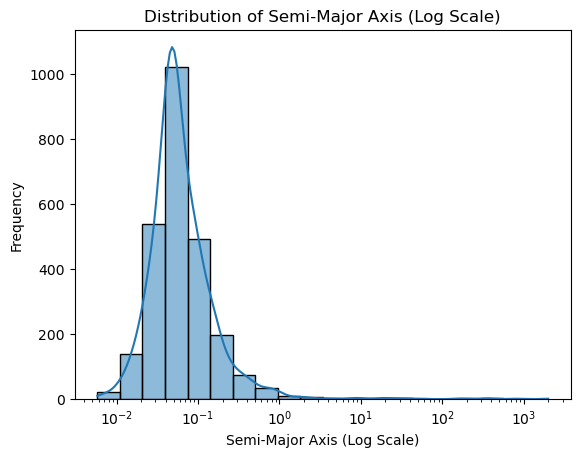

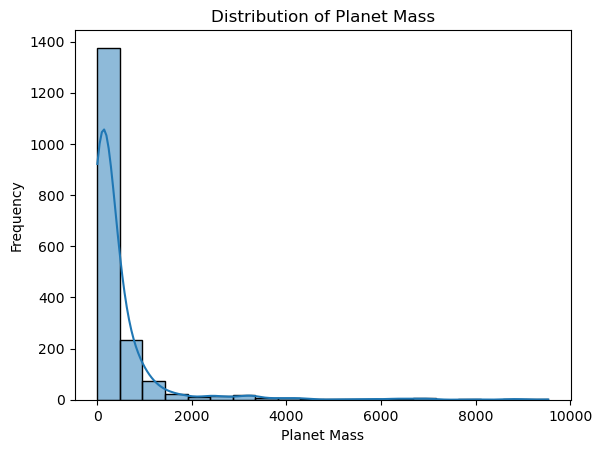

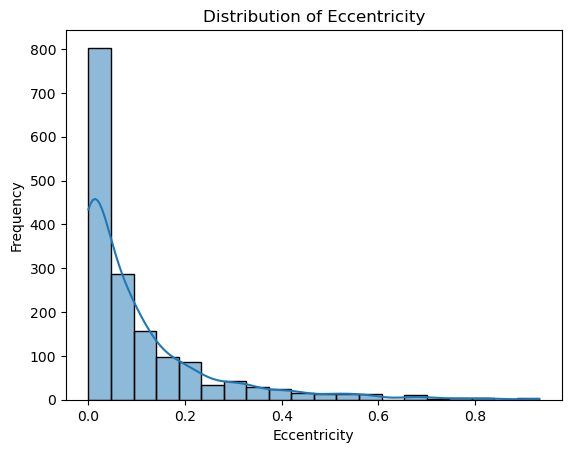

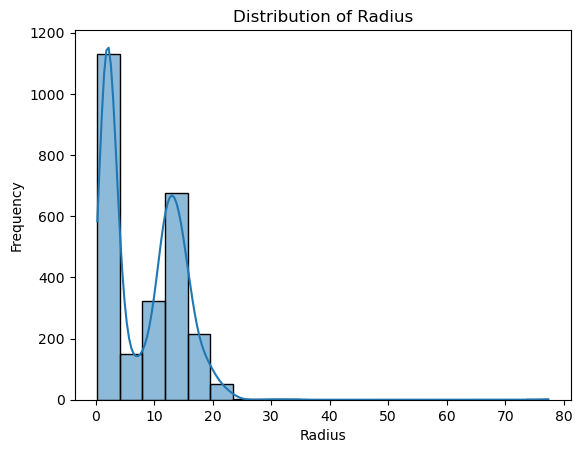

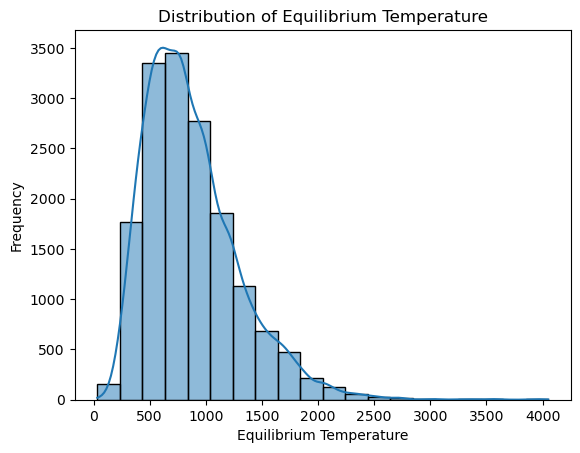

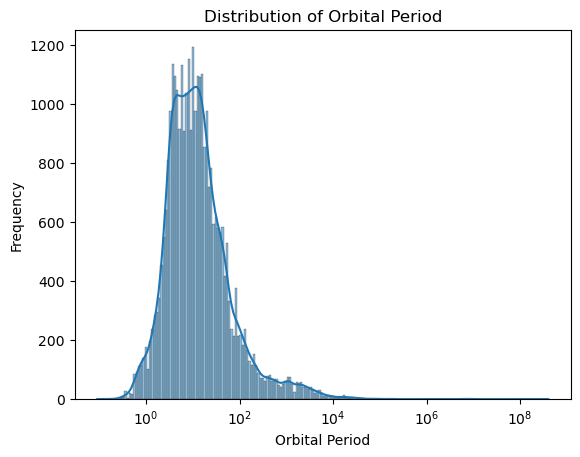

In [59]:
create_histogram(df_filtered, 'pl_orbsmax', 20, True, 'Semi-Major Axis (Log Scale)', 'Frequency', 'Distribution of Semi-Major Axis (Log Scale)', log=True)
create_histogram(df_filtered, 'pl_bmasse', 20, True, 'Planet Mass', 'Frequency', 'Distribution of Planet Mass')
create_histogram(df_filtered, 'pl_orbeccen', 20, True, 'Eccentricity', 'Frequency', 'Distribution of Eccentricity', log=False)
create_histogram(df_filtered, 'pl_rade', 20, True, 'Radius', 'Frequency', 'Distribution of Radius', log=False)
create_histogram(df, 'pl_eqt', 20, True, 'Equilibrium Temperature', 'Frequency', 'Distribution of Equilibrium Temperature', log=False)
create_histogram(df, 'pl_orbper', 200, True, 'Orbital Period', 'Frequency', 'Distribution of Orbital Period', log=True)

Scatterplots

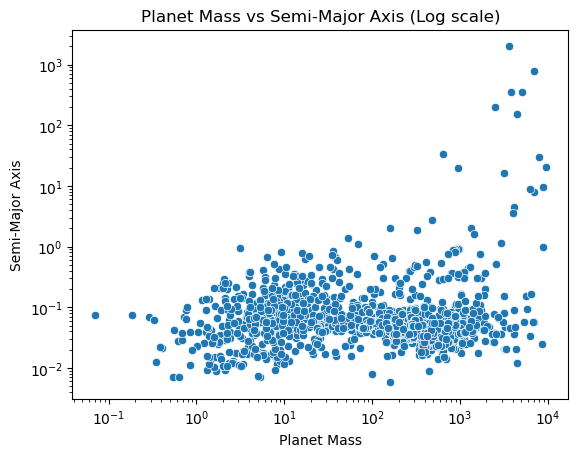

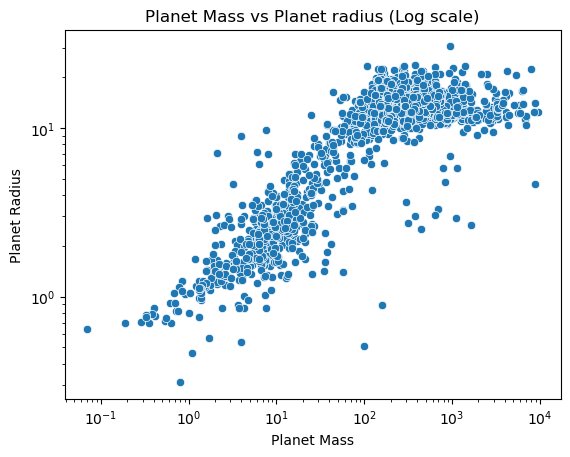

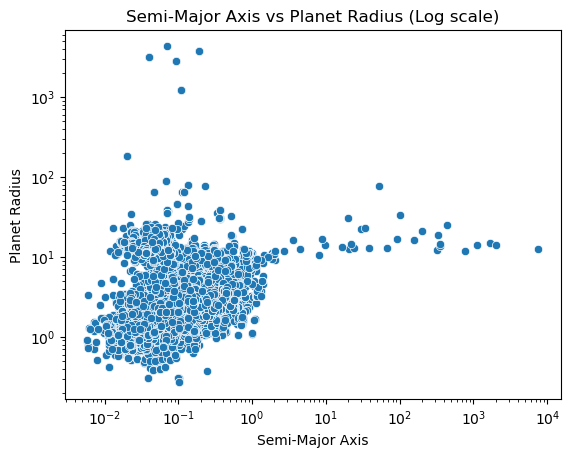

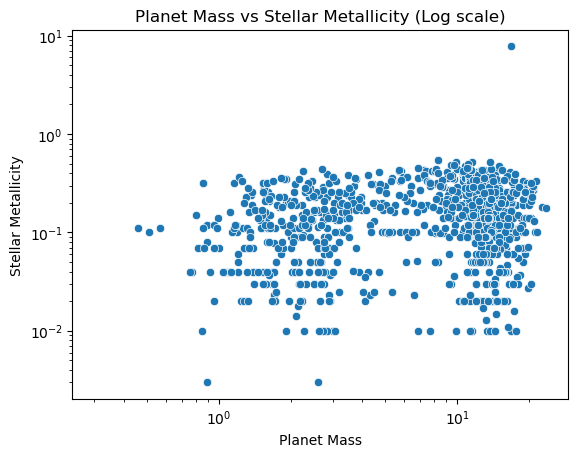

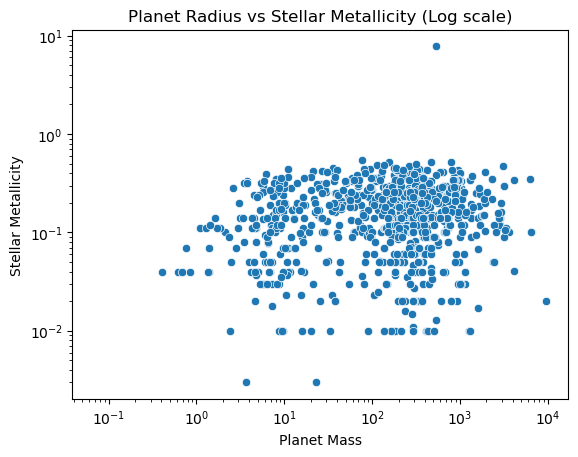

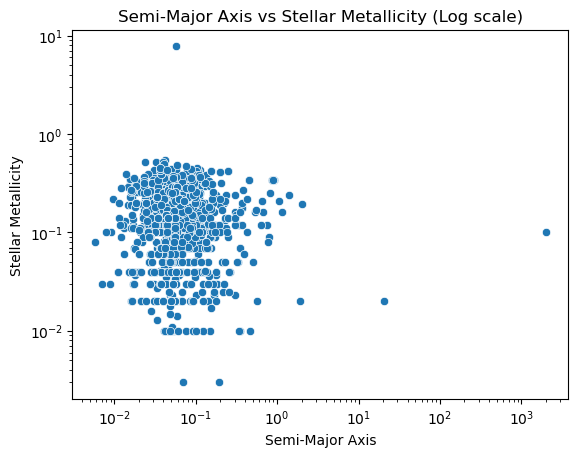

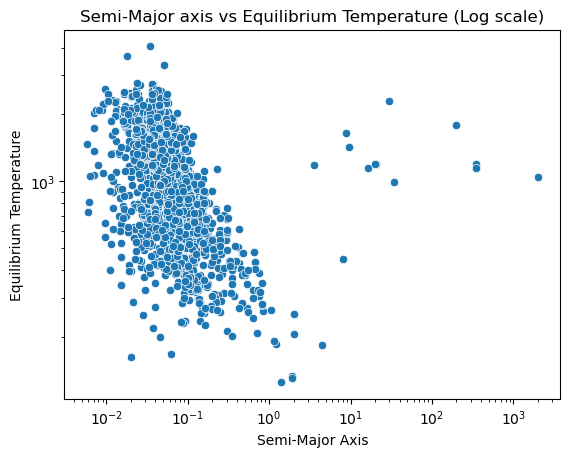

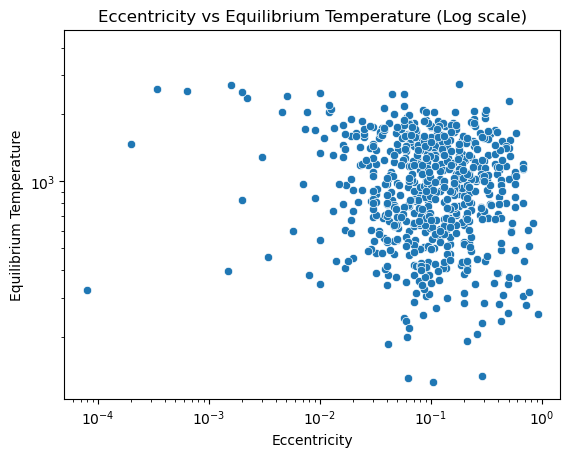

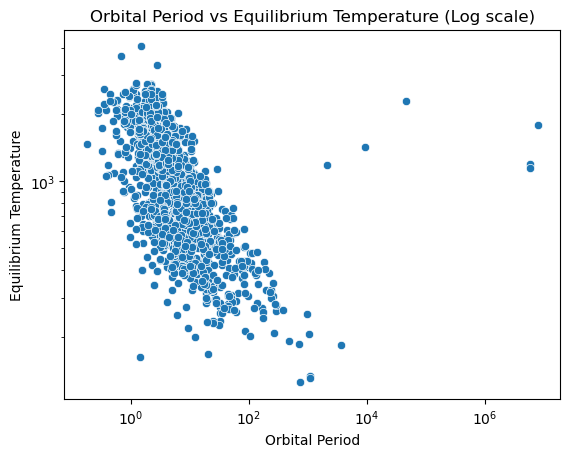

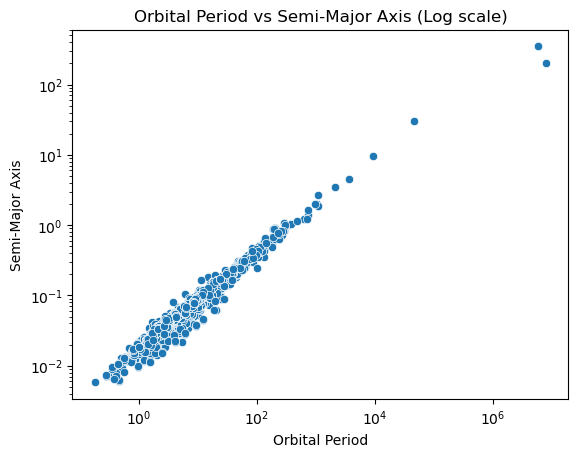

In [61]:

create_scatter_plot(df_filtered, 'pl_bmasse', 'pl_orbsmax', 'Planet Mass', 'Semi-Major Axis', 'Planet Mass vs Semi-Major Axis (Log scale)', log = True)
create_scatter_plot(df_filtered, 'pl_bmasse', 'pl_rade', 'Planet Mass', 'Planet Radius', 'Planet Mass vs Planet radius (Log scale)', log = True)
create_scatter_plot(df, 'pl_orbsmax', 'pl_rade', 'Semi-Major Axis', 'Planet Radius', 'Semi-Major Axis vs Planet Radius (Log scale)', log = True)
create_scatter_plot(df_filtered, 'pl_rade', 'st_met', 'Planet Mass', 'Stellar Metallicity', 'Planet Mass vs Stellar Metallicity (Log scale)', log = True)
create_scatter_plot(df_filtered, 'pl_bmasse', 'st_met', 'Planet Mass', 'Stellar Metallicity', 'Planet Radius vs Stellar Metallicity (Log scale)', log = True)
create_scatter_plot(df_filtered, 'pl_orbsmax', 'st_met', 'Semi-Major Axis', 'Stellar Metallicity', 'Semi-Major Axis vs Stellar Metallicity (Log scale)', log = True)
create_scatter_plot(df_filtered, 'pl_orbsmax', 'pl_eqt', 'Semi-Major Axis', 'Equilibrium Temperature', 'Semi-Major axis vs Equilibrium Temperature (Log scale)', log = True)
create_scatter_plot(df_filtered, 'pl_orbeccen', 'pl_eqt', 'Eccentricity', 'Equilibrium Temperature', 'Eccentricity vs Equilibrium Temperature (Log scale)', log = True)
create_scatter_plot(df_filtered, 'pl_orbper', 'pl_eqt', 'Orbital Period', 'Equilibrium Temperature', 'Orbital Period vs Equilibrium Temperature (Log scale)', log = True)
create_scatter_plot(df_filtered, 'pl_orbper', 'pl_orbsmax', 'Orbital Period', 'Semi-Major Axis', 'Orbital Period vs Semi-Major Axis (Log scale)', log = True)

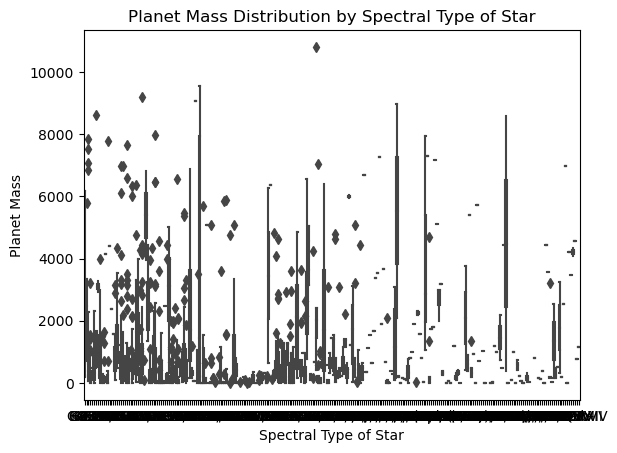

In [51]:
# Example: Box plot for planet mass categorized by spectral type of star
sns.boxplot(x='st_spectype', y='pl_bmasse', data=df)
plt.title('Planet Mass Distribution by Spectral Type of Star')
plt.xlabel('Spectral Type of Star')
plt.ylabel('Planet Mass')
plt.show()


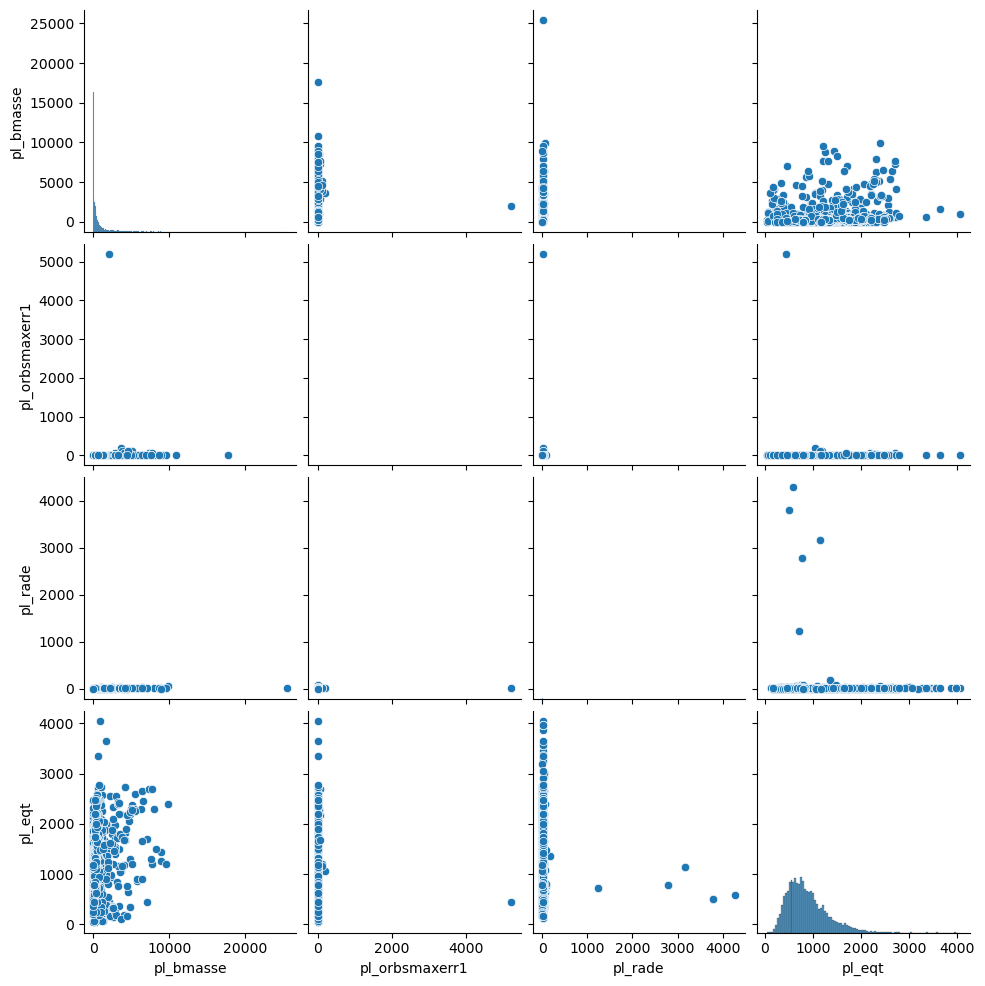

In [41]:
# Pair plot
selected_columns = ['pl_bmasse', 'pl_orbsmaxerr1', 'pl_rade', 'pl_eqt']
sns.pairplot(df[selected_columns])
plt.show()

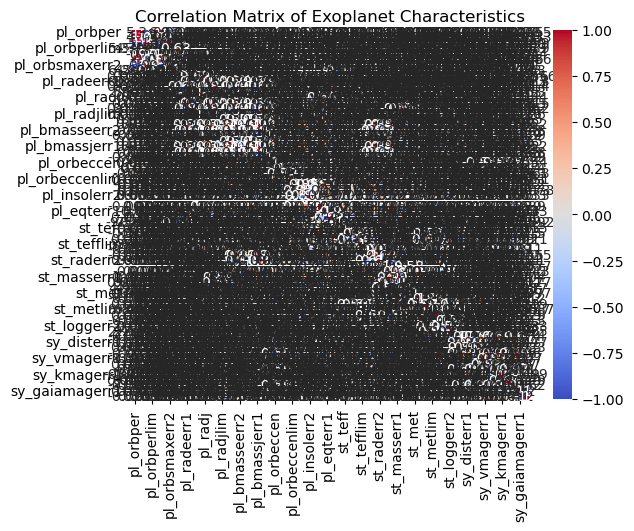

In [39]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Exoplanet Characteristics')
plt.show()

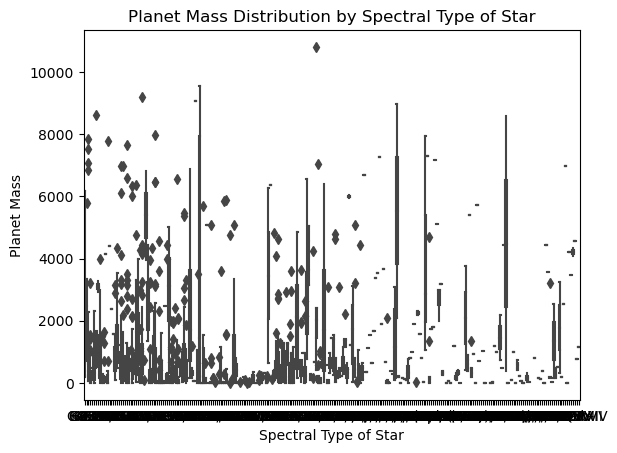

In [38]:
# Create a filtered DataFrame that excludes rows with missing 'st_spectype' values
df_filtered = df.dropna(subset=['st_spectype'])

sns.boxplot(x='st_spectype', y='pl_bmasse', data=df_filtered)
plt.title('Planet Mass Distribution by Spectral Type of Star')
plt.xlabel('Spectral Type of Star')
plt.ylabel('Planet Mass')
plt.show()


Mean Squared Error: 42.77590779427308
R-squared: -0.03578527703002976


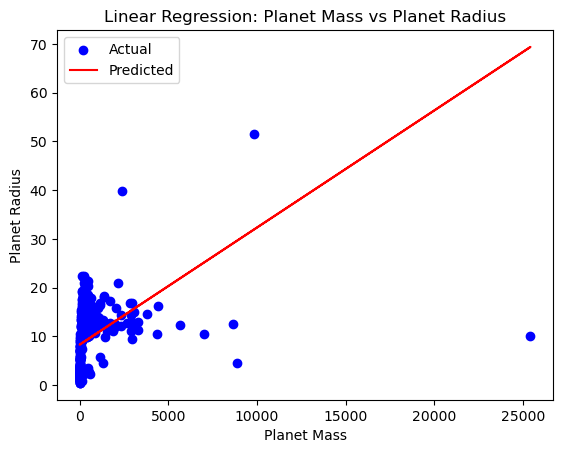

In [72]:

# Using 'pl_bmasse' for planet mass and 'pl_rade' for planet radius
planet_mass_column = 'pl_bmasse'
planet_radius_column = 'pl_rade'

# Filtering out rows with NaN values in the specified columns
df_filtered = df.dropna(subset=[planet_mass_column, planet_radius_column])

# Prepare the data
X = df_filtered[[planet_mass_column]]  # Predictor variable
y = df_filtered[planet_radius_column]  # Response variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plotting the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Linear Regression: Planet Mass vs Planet Radius')
plt.xlabel('Planet Mass')
plt.ylabel('Planet Radius')
plt.legend()
plt.show()


Linear Regression Analysis for Planet Mass vs Semi-Major Axis
Mean Squared Error: 14426.817557985487
R-squared: 0.023400900770850774


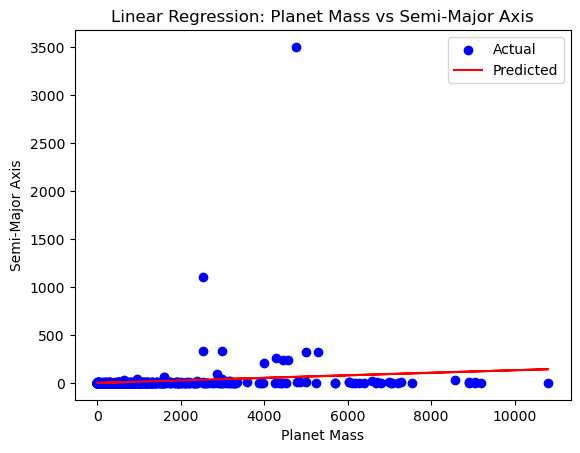

In [80]:

def linear_regression_analysis(df, predictor_var, response_var, x_label, y_label):
    """
    Performs linear regression analysis between two variables in a DataFrame with custom axis labels.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    predictor_var (str): The name of the column to be used as the predictor variable.
    response_var (str): The name of the column to be used as the response variable.
    x_label (str): Custom label for the x-axis.
    y_label (str): Custom label for the y-axis.
    """
    # Filtering out rows with NaN values in the specified columns
    df_filtered = df.dropna(subset=[predictor_var, response_var])

    # Prepare the data
    X = df_filtered[[predictor_var]]  # Predictor variable
    y = df_filtered[response_var]  # Response variable

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Creating a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = model.predict(X_test)

    # Evaluating the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Displaying the results
    print(f"Linear Regression Analysis for {x_label} vs {y_label}")
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

    # Plotting the results
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', label='Predicted')
    plt.title(f'Linear Regression: {x_label} vs {y_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

# Example usage:
linear_regression_analysis(df, 'pl_bmasse', 'pl_orbsmax', 'Planet Mass', 'Semi-Major Axis')


Polynomial Regression (Degree = 2):
Mean Squared Error: 413.4122586850599
R-squared: -9.01045572075607


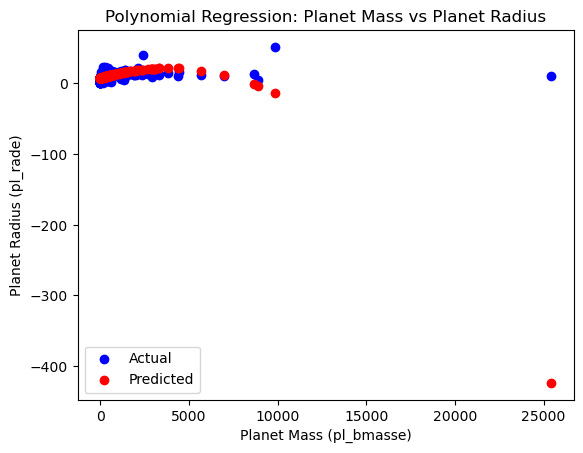

In [73]:
# Create polynomial features
degree = 2  # You can adjust the degree of the polynomial
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X_train)

# Create and train the model
model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)

# Transform test data
X_test_poly = poly.transform(X_test)

# Predict on the test set
y_pred_poly = model_poly.predict(X_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Displaying the results
print("Polynomial Regression (Degree = {}):".format(degree))
print("Mean Squared Error:", mse_poly)
print("R-squared:", r2_poly)

# Optional: Plot the results (for a scatter plot, you would need to sort the values)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_poly, color='red', label='Predicted')
plt.title('Polynomial Regression: Planet Mass vs Planet Radius')
plt.xlabel('Planet Mass (pl_bmasse)')
plt.ylabel('Planet Radius (pl_rade)')
plt.legend()
plt.show()


Polynomial Regression (Degree = 2):
Mean Squared Error: 413.4122586850599
R-squared: -9.01045572075607


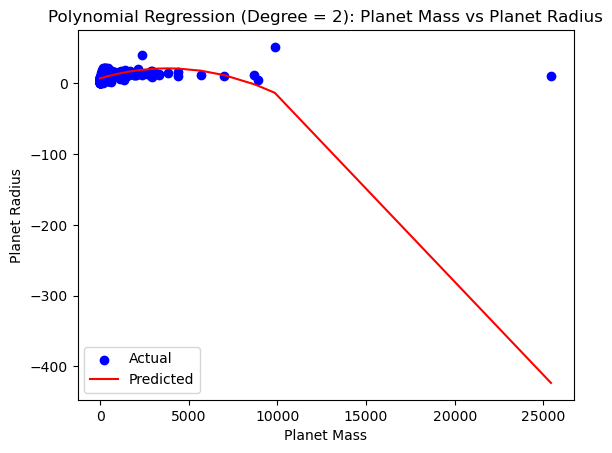

In [81]:
def polynomial_regression_analysis(df, predictor_var, response_var, degree, x_label, y_label):
    """
    Performs polynomial regression analysis between two variables in a DataFrame with custom axis labels.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    predictor_var (str): The name of the column to be used as the predictor variable.
    response_var (str): The name of the column to be used as the response variable.
    degree (int): The degree of the polynomial regression.
    x_label (str): Custom label for the x-axis.
    y_label (str): Custom label for the y-axis.
    """
    # Filtering out rows with NaN values
    df_filtered = df.dropna(subset=[predictor_var, response_var])

    # Prepare the data
    X = df_filtered[[predictor_var]]  # Predictor variable
    y = df_filtered[response_var]  # Response variable

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X_train)

    # Create and train the model
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y_train)

    # Transform test data
    X_test_poly = poly.transform(X_test)

    # Predict on the test set
    y_pred_poly = model_poly.predict(X_test_poly)

    # Evaluate the model
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)

    # Displaying the results
    print(f"Polynomial Regression (Degree = {degree}):")
    print("Mean Squared Error:", mse_poly)
    print("R-squared:", r2_poly)

    # Plotting the results
    # Sorting the test data and predicted values for plotting
    sorted_indices = np.argsort(X_test.iloc[:, 0])
    X_test_sorted = X_test.iloc[sorted_indices, 0]
    y_test_sorted = y_test.iloc[sorted_indices]
    y_pred_sorted = y_pred_poly[sorted_indices]

    plt.scatter(X_test_sorted, y_test_sorted, color='blue', label='Actual')
    plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Predicted')
    plt.title(f'Polynomial Regression (Degree = {degree}): {x_label} vs {y_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

# Example usage:
polynomial_regression_analysis(df_filtered, 'pl_bmasse', 'pl_rade', 2, 'Planet Mass', 'Planet Radius')


Polynomial Regression (Degree = 2)
Mean Squared Error: 23.57064713802882
R-squared: 0.32310613294827795


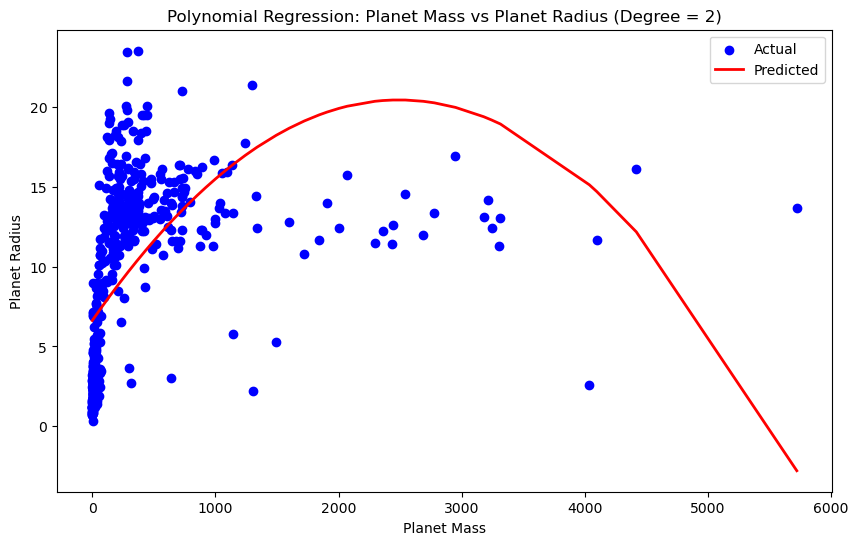

In [93]:
# Filtering out rows where planet mass is above 15000
df_filtered = df[df['pl_bmasse'] <= 6000]

# Further remove any rows with NaN or infinite values in 'pl_bmasse' or 'pl_rade'
df_filtered = df_filtered.dropna(subset=['pl_bmasse', 'pl_rade'])
df_filtered = df_filtered[np.isfinite(df_filtered['pl_bmasse']) & np.isfinite(df_filtered['pl_rade'])]

# Prepare the data with the filtered DataFrame
X_filtered = df_filtered[['pl_bmasse']]  # Predictor variable
y_filtered = df_filtered['pl_rade']  # Response variable

# Splitting the data into training and testing sets
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=0)

# Create polynomial features
degree = 2
poly = PolynomialFeatures(degree)
X_poly_filtered = poly.fit_transform(X_train_filtered)

# Create and train the model
model_poly_filtered = LinearRegression()
model_poly_filtered.fit(X_poly_filtered, y_train_filtered)

# Transform test data
X_test_poly_filtered = poly.transform(X_test_filtered)

# Predict on the test set
y_pred_poly_filtered = model_poly_filtered.predict(X_test_poly_filtered)

# Evaluate the model
mse_poly_filtered = mean_squared_error(y_test_filtered, y_pred_poly_filtered)
r2_poly_filtered = r2_score(y_test_filtered, y_pred_poly_filtered)

# Displaying the results
print("Polynomial Regression (Degree = {})".format(degree))
print("Mean Squared Error:", mse_poly_filtered)
print("R-squared:", r2_poly_filtered)

# Sorting the test data and predicted values for plotting
# Ensure X_test_filtered is a DataFrame and convert it to a Numpy array for sorting
X_test_filtered_array = X_test_filtered.to_numpy()
sorted_indices = np.argsort(X_test_filtered_array[:, 0])
X_test_sorted = X_test_filtered_array[sorted_indices, 0]  # Extracting the sorted values
y_test_sorted = y_test_filtered.iloc[sorted_indices].to_numpy()
y_pred_sorted = y_pred_poly_filtered[sorted_indices]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test_sorted, y_test_sorted, color='blue', label='Actual')
plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Predicted', linewidth=2)
plt.title('Polynomial Regression: Planet Mass vs Planet Radius (Degree = {})'.format(degree))
plt.xlabel('Planet Mass')
plt.ylabel('Planet Radius')
plt.legend()
plt.show()

In [81]:
# Filtering out rows where planet mass is above 15000
df_filtered = df[df['pl_bmasse'] <= 6000]

# Further remove any rows with NaN or infinite values in 'pl_bmasse' or 'pl_rade'
df_filtered = df_filtered.dropna(subset=['pl_bmasse', 'pl_rade'])
df_filtered = df_filtered[np.isfinite(df_filtered['pl_bmasse']) & np.isfinite(df_filtered['pl_rade'])]

# Prepare the data with the filtered DataFrame
X_filtered = df_filtered[['pl_bmasse']]  # Predictor variable
y_filtered = df_filtered['pl_rade']  # Response variable

# Splitting the data into training and testing sets
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=0)

# Create polynomial features
degree = 3
poly = PolynomialFeatures(degree)
X_poly_filtered = poly.fit_transform(X_train_filtered)

# Create and train the model
model_poly_filtered = LinearRegression()
model_poly_filtered.fit(X_poly_filtered, y_train_filtered)

# Transform test data
X_test_poly_filtered = poly.transform(X_test_filtered)

# Predict on the test set
y_pred_poly_filtered = model_poly_filtered.predict(X_test_poly_filtered)

# Evaluate the model
mse_poly_filtered = mean_squared_error(y_test_filtered, y_pred_poly_filtered)
r2_poly_filtered = r2_score(y_test_filtered, y_pred_poly_filtered)

# Displaying the results
print("Polynomial Regression (Degree = {}) after filtering:".format(degree))
print("Mean Squared Error:", mse_poly_filtered)
print("R-squared:", r2_poly_filtered)

Polynomial Regression (Degree = 3) after filtering:
Mean Squared Error: 17.402193373179887
R-squared: 0.5002497004611863


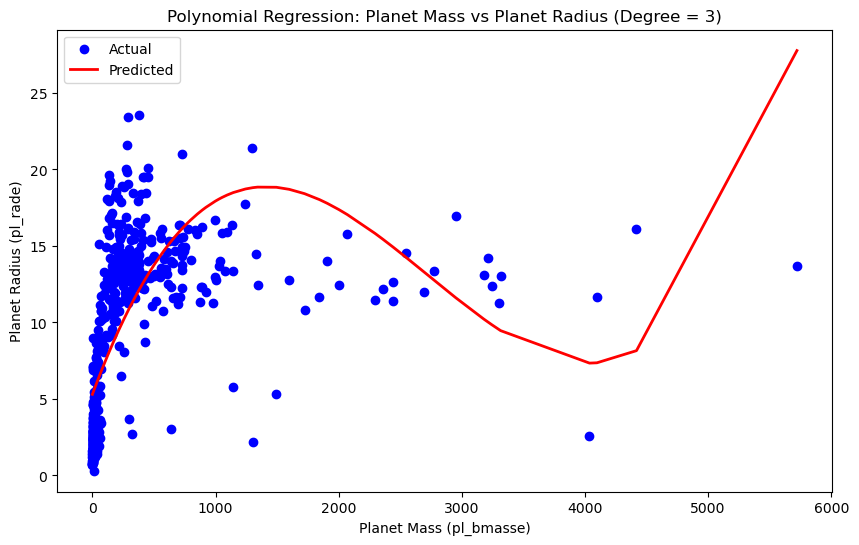

In [82]:
# Sorting the test data and predicted values for plotting
# Ensure X_test_filtered is a DataFrame and convert it to a Numpy array for sorting
X_test_filtered_array = X_test_filtered.to_numpy()
sorted_indices = np.argsort(X_test_filtered_array[:, 0])
X_test_sorted = X_test_filtered_array[sorted_indices, 0]  # Extracting the sorted values
y_test_sorted = y_test_filtered.iloc[sorted_indices].to_numpy()
y_pred_sorted = y_pred_poly_filtered[sorted_indices]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test_sorted, y_test_sorted, color='blue', label='Actual')
plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Predicted', linewidth=2)
plt.title('Polynomial Regression: Planet Mass vs Planet Radius (Degree = {})'.format(degree))
plt.xlabel('Planet Mass (pl_bmasse)')
plt.ylabel('Planet Radius (pl_rade)')
plt.legend()
plt.show()


Random Forest Regression:
Mean Squared Error: 10.34855539445463
R-squared: 0.7028136886386243


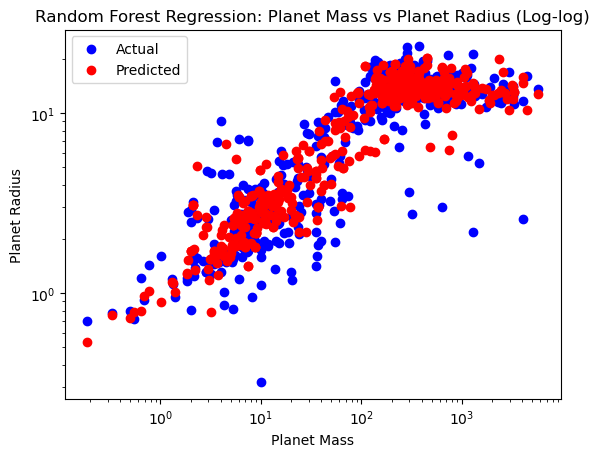

Feature Importances: [1.]


In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)  # 100 trees in the forest
rf_model.fit(X_train_filtered, y_train_filtered)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_filtered)

# Evaluate the model
mse_rf = mean_squared_error(y_test_filtered, y_pred_rf)
r2_rf = r2_score(y_test_filtered, y_pred_rf)

# Displaying the results
print("Random Forest Regression:")
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

#Optional: Plotting the results (for a scatter plot, you would need to sort the values)
plt.scatter(X_test_filtered, y_test_filtered, color='blue', label='Actual')
plt.scatter(X_test_filtered, y_pred_rf, color='red', label='Predicted')
plt.title('Random Forest Regression: Planet Mass vs Planet Radius (Log-log)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Planet Mass')
plt.ylabel('Planet Radius')
plt.legend()
plt.show()

# Optional: Feature Importance
feature_importances = rf_model.feature_importances_
print("Feature Importances:", feature_importances)


In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the random forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}

# Create a base model
rf = RandomForestRegressor(random_state=0)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train_filtered, y_train_filtered)

# View the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model using the best parameters
best_rf = RandomForestRegressor(**best_params, random_state=0)
best_rf.fit(X_train_filtered, y_train_filtered)

# Predict on the test set
y_pred_best_rf = best_rf.predict(X_test_filtered)

# Evaluate the best model
mse_best_rf = mean_squared_error(y_test_filtered, y_pred_best_rf)
r2_best_rf = r2_score(y_test_filtered, y_pred_best_rf)

# Displaying the results
print("Random Forest Regression with Best Parameters:")
print("Mean Squared Error:", mse_best_rf)
print("R-squared:", r2_best_rf)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Random Forest Regression with Best Parameters:
Mean Squared Error: 7.737896991816221
R-squared: 0.7777856930712852


Random Forest Regression with Best Parameters:
Mean Squared Error: 7.737896991816221
R-squared: 0.7777856930712852


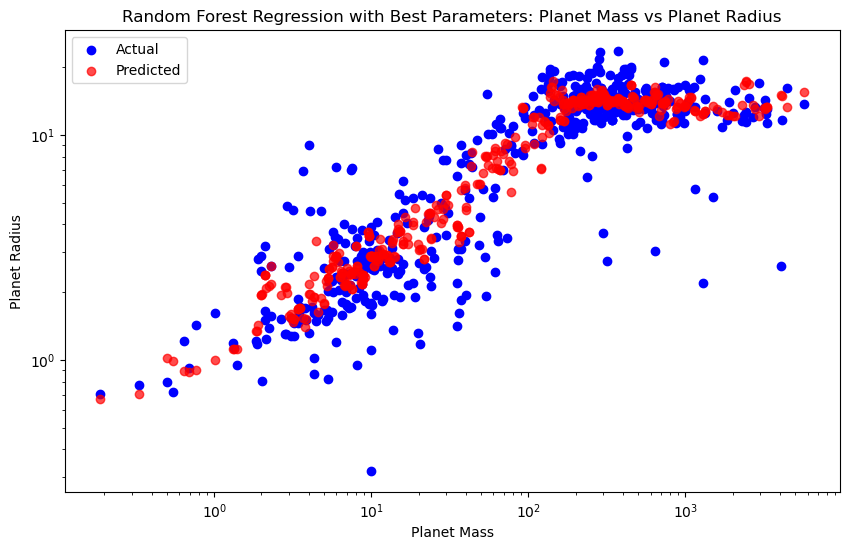

In [100]:
import matplotlib.pyplot as plt
print("Random Forest Regression with Best Parameters:")
print("Mean Squared Error:", mse_best_rf)
print("R-squared:", r2_best_rf)
# Plotting the results of the best model
plt.figure(figsize=(10, 6))
plt.scatter(X_test_filtered, y_test_filtered, color='blue', label='Actual')
plt.scatter(X_test_filtered, y_pred_best_rf, color='red', label='Predicted', alpha=0.7)
plt.title('Random Forest Regression with Best Parameters: Planet Mass vs Planet Radius')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Planet Mass')
plt.ylabel('Planet Radius')
plt.legend()
plt.show()
